# Importazione librerie

In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd

# Conversione files e Importazione datasets

## Convesione da `.csv` a `.parquet`

Data la grande dimensione di alcuni dei dataset utilizzati, questi verranno convertiti da `.csv` a `.parquet` (Apache Parquet Format)

In [3]:
#df = pd.read_csv('./Datasets/Dati_sensori_meteo_2021.csv', low_memory=False)
#df.to_parquet('./Datasets/Dati_sensori_meteo_2021.parquet')

Il codice sotto funziona ma riempie la RAM

In [4]:
#dtypes = {'IdSensore': 'string', 'Valore': 'string'}
#parse_dates
#meteo = pd.concat(
#    map(pd.read_parquet, [
#        f'{path}Dati_sensori_meteo_2021_parte_1.parquet',
#        f'{path}Dati_sensori_meteo_2021_parte_2.parquet'
#    ]))
#meteo.head()

Importazione datasets convertiti

In [5]:
path = './data/'

## Rilevazioni sensori metereologici 2020 e 2021

#### Attributi: 
- IdSensore: 
    - Tipologia: Testo normale
- Data: 
    - Data e ora, Marcatura oraria flessibile
- Valore: 
    - Tipologia: numero
    - Legenda: 9999 = dato mancante 888, 8888 = direzione vento variabile 777, 7777 = calma (solo per direzione di vento)
- idOperatore	
    - *Molto utile per capire la dimensione del dato*
    - LEGENDA: 1: Valore medio 3: Valore massimo 4: Valore cumulato (per la pioggia)
    - Testo normale
- Stato	
    - LEGENDA: VA, VV = dato valido NA, NV, NC = dato invalido NI = dato incerto ND = dato non disponibile
    - Testo normale

In [6]:
#meteo_21 = pd.read_parquet(f'{path}/data_meteo/Dati_sensori_meteo_2021.parquet')
#meteo_21.head()

## Sensori metereologici

#### Attributi: 
- **IdSensore**
    - Foreign Key con vincolo di integrità referenziale a `IdSensore` di meteo_21
    - Testo normale
- **Tipologia**
    - Grandezza misurata
    - Testo normale
- **Unità DiMisura**
    - Unità di misura della grandezza
    - Testo normale
- IdStazione	
    - Numero identificativo della stazione (penso perchè ogni stazione può avere più sensori)
    - Testo normale
- NomeStazione	
    - Località della stazione (Spesso è 'Comune via' o 'Comune località)'
    - Testo normale
- Quota	
    - Altitudine
    - Numero
- Provincia
    - Sigla della provincia
    - Testo normale
- DataStart	
    - Data e ora
- DataStop	
    - Data e ora
- Storico	
    - Noto che assume valori N e S ma non capisco cosa sia
    - Testo normale
- UTM_Nord	
    - Coordinata UTM nord (le cordinate utm permettono di individuare univocamente un punto sulla cartina terrestre)
    - Testo normale
- UTM_Est	
    - Coordinata UTM est
    - Testo normale
- lng	
    - Longitudine (senza simbolo gradi)
    - Numero
- lat	
    - Latitudine (senza simbolo gradi)
    - Numero
- location	
    - (latitudine°, longitudine°)
    - Posizione
    
##### Grandezze disponibili
Sono disponibili i dati delle grandezze:
- Livello Idrometrico (cm)
- Altezza neve (cm)
- Precipitazione (mm)
- Temperatura (°C)
- Umidità Relativa (%)
- Radiazione Globale (W/m2)
- Velocità e Direzione Vento (m/s e gradi).
- Velocità e direzione del vento (m/s e gradi N) raffica
NB: l’orario del dato è "ora solare" e si riferisce alle osservazioni ottenute fino all’orario indicato.

In [7]:
#sensori_meteo = pd.read_csv(f'{path}Stazioni_Meteorologiche.csv', dtype = {'Tipologia': 'category'})
#sensori_meteo.head()
#stazioni_meteo['Tipologia'].value_counts()

## Rilevazioni sensori qualità dell'aria 2020 e 2021

#### Attributi: 
- **IdSensore**: 
    - Identificativo Univoco che distingue il sensore
    - Tipologia: Testo normale
- **Data**: 
    - Data e ora, Marcatura oraria flessibile
    - I dati forniti hanno frequenza oraria tranne PM10 e PM2.5 per i quali è fornita la media giornaliera.
- **Valore**: 
    - Tipologia: numero
    - LEGENDA:-9999 = dato mancante o invalido
- **idOperatore**
    - *Molto utile per capire la dimensione del dato*
    - LEGENDA: 1: Valore medio 
    - In realtà: I dati forniti hanno frequenza oraria tranne PM10 e PM2.5 per i quali è fornita la media giornaliera.
    - Testo normale
- **Stato**	
    - VA = dato valido NA = dato invalido I dati presenti in questo archivio relativi agli ultimi 3-6 mesi, contengono ancora valori incerti che possono subire modifiche da parte degli operatori delle reti (invalidazione manuale). Il processo di validazione dei dati prevede una fase di valutazione finale che si conclude entro il 30.3 dell’anno successivo a quello di misura.
    - Testo normale

#### Caratteristiche

- La rete di rilevamento della qualità dell’aria di ARPA Lombardia è costituita da stazioni fisse che, per mezzo di analizzatori automatici, forniscono dati in continuo ad intervalli temporali regolari. 
- Le specie di inquinanti monitorate in continuo sono NOX, SO2, CO, O3, PM10, PM2.5 e benzene. A seconda del contesto ambientale nel quale è attivo il monitoraggio, diversa è la tipologia di inquinanti che è necessario rilevare. Pertanto, non tutte le stazioni sono dotate della medesima strumentazione analitica. 
- Le postazioni regionali sono distribuite su tutto il territorio regionale in funzione della densità abitativa e della tipologia di territorio rispettando i criteri definiti dal D.Lgs. 155/2010.
- **I dati forniti hanno frequenza oraria tranne PM10 e PM2.5 per i quali è fornita la media giornaliera.**

In [8]:
# Converto in importazione i -9999 in NA
aria_20 = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2020.csv',
                      na_values=['-9999'],
                      parse_dates=['Data'])
aria_20.dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [9]:
# Converto in importazione i -9999 in NA
aria_21 = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2021.csv',
                      na_values=['-9999'],
                      parse_dates=['Data'])


In [10]:
aria_20_21 = pd.concat([aria_20, aria_21]).reset_index(drop=True)
aria_20_21.tail()

,IdSensore,Data,Valore,Stato,idOperatore
5246071,10331,2021-12-19 03:00:00,45.7,VA,1
5246072,10333,2021-12-24 19:00:00,39.8,VA,1
5246073,10331,2021-12-20 18:00:00,27.6,VA,1
5246074,10333,2021-12-25 11:00:00,84.7,VA,1
5246075,10331,2021-12-21 04:00:00,34.3,VA,1


## Sensori qualità dell'aria

##### Attributi: 
- IdSensore
    - Foreign Key con vincolo di integrità referenziale a `IdSensore` di aria_21
    - Testo normale
- NomeTipoSensore	
    - Grandezza misurata
    - Testo normale
- Unità DiMisura	
    - Unità di misura della grandezza
    - Testo normale
- IdStazione	
    - Numero identificativo della stazione (penso perchè ogni stazione può avere più sensori)
    - Testo normale
- NomeStazione	
    - Località della stazione (Spesso è 'Comune via' o 'Comune località)'
    - Testo normale
- Quota	
    - Altitudine
    - Numero
- Provincia
    - Sigla della provincia
    - Testo normale
- DataStart	
    - Data e ora
- DataStop	
    - Data e ora
- Storico	
    - Noto che assume valori N e S ma non capisco cosa sia
    - Testo normale
- UTM_Nord	
    - Coordinata UTM nord (le cordinate utm permettono di individuare univocamente un punto sulla cartina terrestre)
    - Testo normale
- UTM_Est	
    - Coordinata UTM est
    - Testo normale
- lng	
    - Longitudine (senza simbolo gradi)
    - Numero
- lat	
    - Latitudine (senza simbolo gradi)
    - Numero
- location	
    - (latitudine°, longitudine°)
    - Posizione

In [11]:
sensori_aria = pd.read_csv(f'{path}Stazioni_qualita_dell_aria.csv',
                           parse_dates=['DataStart', 'DataStop'],
                           dtype={'Storico':'category'})
sensori_aria.tail()

,IdSensore,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location
961,6606,Particolato Totale Sospeso,µg/m³,591,Seriate v. Garibaldi,256.0,BG,Seriate,S,1991-11-20,2000-01-27,5059449,555672,45.686356,9.714948,"(45.68635606439914, 9.714947917631529)"
962,6382,Ossidi di Azoto,µg/m³,569,Sondrio v.Mazzini,307.0,SO,Sondrio,N,1993-01-11,NaT,5113078,567173,46.167967,9.870144,"(46.16796681227828, 9.87014407497457)"
963,6607,Particolato Totale Sospeso,µg/m³,591,Seriate v. Garibaldi,256.0,BG,Seriate,S,2000-07-09,2002-04-04,5059449,555672,45.686356,9.714948,"(45.68635606439914, 9.714947917631529)"
964,20523,Ammoniaca,µg/m³,583,Bergamo v.Meucci,249.0,BG,Bergamo,N,NaT,NaT,5059922,550116,45.691037,9.643651,"(45.69103740547214, 9.643650579461385)"
965,12597,Cadmio,ng/m³,609,Casirate d'Adda v. Cimitero,108.0,BG,Casirate d'Adda,N,2008-04-24,NaT,5038450,543458,45.498227,9.556232,"(45.49822713394494, 9.556232262351761)"


In [12]:
sensori_aria.dtypes

IdSensore                   int64
NomeTipoSensore            object
UnitaMisura                object
Idstazione                  int64
NomeStazione               object
Quota                     float64
Provincia                  object
Comune                     object
Storico                  category
DataStart          datetime64[ns]
DataStop           datetime64[ns]
Utm_Nord                    int64
UTM_Est                     int64
lat                       float64
lng                       float64
location                   object
dtype: object

## Zonizzazione

In [13]:
zonizzazione = pd.read_csv(f'{path}zonizzazione/zonizzazione_ABCD.csv')
zonizzazione.head()

,Provincia,Codice Istat,Comune,Zona,Residenti 2008,Superficie (ha)
0,BG,16009,AMBIVERE,A,2341,327
1,BG,16013,ARZAGO D'ADDA,A,2836,944
2,BG,16018,BAGNATICA,A,4119,639
3,BG,16020,BARIANO,A,4396,714
4,BG,16021,BARZANO',A,5178,356


In [14]:
zonizzazione['Zona'].value_counts()

B         448
C         423
A         406
AGG MI    107
C D       102
AGG BG     37
AGG BS     20
D           2
Name: Zona, dtype: int64

## Exploratory Data Analysis and Data Cleansing

- verificare quali siano tutte le quantità uniche rilevate dai sensori qualità dell'aria
- quali siano i gruppi di inquinanti principali
- quali siano i limiti di assunzione umana (gionralieri e annuali)
    - Vedi [qui](https://www.arpalombardia.it/Pages/Aria/Inquinanti.aspx) per limiti e piccola descrizione
    - Vedi [qui](https://www.regione.lombardia.it/wps/portal/istituzionale/HP/DettaglioRedazionale/servizi-e-informazioni/cittadini/salute-e-prevenzione/Sicurezza-negli-ambienti-di-vita-e-di-lavoro/inquinamento-atmosferico/inquinamento-atmosferico/) per approfondimento

Determino il numero di sensori per ogni tipologia

In [15]:
sensori_aria['NomeTipoSensore'].value_counts()

Biossido di Azoto             166
Ossidi di Azoto               166
Biossido di Zolfo             125
Monossido di Carbonio         101
Ozono                          91
PM10 (SM2005)                  90
Particolato Totale Sospeso     55
Particelle sospese PM2.5       40
Benzene                        32
Benzo(a)pirene                 15
Arsenico                       15
Cadmio                         15
Nikel                          15
Piombo                         15
Ammoniaca                      14
PM10                            4
BlackCarbon                     4
Monossido di Azoto              3
Name: NomeTipoSensore, dtype: int64

- Si potrebbero considerare solo gli inquinanti **più importanti e con più stazioni**
- Ovvero **Biossido di Azoto | PM10 (SM2005) e PM2,5 e/o Particolato totale | Ozono troposferico | Bisossido di Zolfo**
- Facoltativi perchè non presenti nella valutazione della qualità dell'aria [qui](https://www.arpalombardia.it/Pages/Aria/Modellistica/Indice-qualit%C3%A0-aria.aspx): Monossido di carbonio e benzene

## Missing value e valori non validi

Voglio verificare i *dati invalidi* presenti nei due dataset dei dati
- Solo validi per il meteo

In [16]:
aria_20_21['Valore'].isna().sum()
#meteo_21['Stato'].value_counts(dropna = False)

108373

- Un discreto numero di NaN nei dati sulla qualità dell'aria (c'è congruenza tra i NaN di stato e di valore)

In [17]:
aria_20_21['Stato'].value_counts(dropna = False)

VA     5137703
NaN     108373
Name: Stato, dtype: int64

## Riduzione dimensioni

Meteo: 343 stazioni con 1262 sensori

Aria: 174 stazioni con 966 sensori

Zonizzazione: 9 826 141 abitanti in 1546 comuni divisi in 7 o 8 zone

### Riduzione dimensioni `aria_20_21` (eventuale `meteo_21`)

#### Rimozione righe mancanti
- L'invalidità del dato è descritta sia dall'attributo `Stato` che dalla presenza di NaN in `Valore`
- MA (VA = dato valido NA = dato invalido I dati presenti in questo archivio relativi agli ultimi 3-6 mesi, contengono ancora valori incerti che possono subire modifiche da parte degli operatori delle reti (invalidazione manuale). Il processo di validazione dei dati prevede una fase di valutazione finale che si conclude entro il 30.3 dell’anno successivo a quello di misura)

In [18]:
#aria_20_21.dropna(subset = ['Valore', 'Stato'], inplace = True) #é meglio non farla cosi le avg possono restituire anche NaN
aria_20_21.reset_index(drop=True, inplace=True)
aria_20_21.shape

(5246076, 5)

#### Rimozione sensori di grandezze minori
- da `stazioni_aria` e `aria_20_21` trovare solo gli `IdSensore` di tipologia utile
- Biossido di Azoto | PM10 (SM2005) e PM2,5 e/o Particolato totale | Ozono troposferico | Bisossido di Zolfo 
- Come categorie minori decido di tenere momentaneamente *Monossido di carbonio, benzene, Ossidi di Azoto e PM10*

In [19]:
sensori_aria['NomeTipoSensore'].value_counts()

Biossido di Azoto             166
Ossidi di Azoto               166
Biossido di Zolfo             125
Monossido di Carbonio         101
Ozono                          91
PM10 (SM2005)                  90
Particolato Totale Sospeso     55
Particelle sospese PM2.5       40
Benzene                        32
Benzo(a)pirene                 15
Arsenico                       15
Cadmio                         15
Nikel                          15
Piombo                         15
Ammoniaca                      14
PM10                            4
BlackCarbon                     4
Monossido di Azoto              3
Name: NomeTipoSensore, dtype: int64

In [20]:
grandezze_di_interesse = ['Biossido di Azoto',
 'PM10 (SM2005)',
 'Ossidi di Azoto',
 'Ozono',
 'Biossido di Zolfo',
 'Particolato Totale Sospeso',
 'Monossido di Carbonio',
 'Particelle sospese PM2.5',
 'Benzene']
sensori_aria.drop(sensori_aria[~sensori_aria['NomeTipoSensore'].isin(grandezze_di_interesse)].index, inplace = True)
sensori_aria.reset_index(drop=True, inplace=True)
sensori_aria

,IdSensore,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location
0,17286,Biossido di Azoto,µg/m³,1374,Monza Parco,181.0,MB,Monza,N,2013-01-05,NaT,5049780,521452,45.601232,9.275073,"(45.60123219955139, 9.27507265782848)"
1,17290,PM10 (SM2005),µg/m³,1374,Monza Parco,181.0,MB,Monza,N,2013-02-15,NaT,5049780,521452,45.601232,9.275073,"(45.60123219955139, 9.27507265782848)"
2,17285,Ossidi di Azoto,µg/m³,1374,Monza Parco,181.0,MB,Monza,N,2013-01-05,NaT,5049780,521452,45.601232,9.275073,"(45.60123219955139, 9.27507265782848)"
3,17288,Ozono,µg/m³,1374,Monza Parco,181.0,MB,Monza,N,2013-09-02,NaT,5049780,521452,45.601232,9.275073,"(45.60123219955139, 9.27507265782848)"
4,10112,Ozono,µg/m³,698,Ceneselli v. Moro,13.0,RO,Ceneselli,S,2006-11-28,2017-01-01,4987161,686934,45.013257,11.372345,"(45.01325676849334, 11.372344948058235)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,6288,Ossidi di Azoto,µg/m³,551,Arconate v. De Gasperi,182.0,MI,Arconate,N,1999-01-20,NaT,5043898,488082,45.548517,8.847322,"(45.54851735741946, 8.847321929216262)"
862,6614,Particolato Totale Sospeso,µg/m³,584,Bergamo v.Garibaldi,249.0,BG,Bergamo,S,1994-06-15,2005-10-21,5060449,551482,45.695680,9.661249,"(45.69568034432694, 9.66124914606551)"
863,6606,Particolato Totale Sospeso,µg/m³,591,Seriate v. Garibaldi,256.0,BG,Seriate,S,1991-11-20,2000-01-27,5059449,555672,45.686356,9.714948,"(45.68635606439914, 9.714947917631529)"
864,6382,Ossidi di Azoto,µg/m³,569,Sondrio v.Mazzini,307.0,SO,Sondrio,N,1993-01-11,NaT,5113078,567173,46.167967,9.870144,"(46.16796681227828, 9.87014407497457)"


#### Rimozione righe con idoperatore assurdo

In [21]:
aria_20_21.value_counts('idOperatore')

idOperatore
1        5246075
15504          1
dtype: int64

In [22]:
aria_20_21.drop(aria_20_21[aria_20_21.idOperatore == 15504].index, inplace=True)
aria_20_21.reset_index(drop=True, inplace=True)

# Data preparation

## Grouping e calcolo grandezze aggegate (GROUP by per id_sensore e giorno)

- Raggruppo per `IdSensore` e `Data`(giorno)
- Calcolo grandezze aggregate
    - Calcolo il valore medio e la deviazione standard del `Valore` registrato dal senbsore
    - Importante sottolineare che le funzioni `mean, count e std` di pandas NON tengono conto dei Na, quindi i valori che vediamo sono esatti


In [23]:
colnames = ['IdSensore', 'Data', 'Valore_MEAN_id_day', 'Valore_COUNT_id_day', 'Valore_STD_id_day']
aria__id_day = aria_20_21[['IdSensore', 'Data', 'Valore']].groupby([
    'IdSensore',
    aria_20_21['Data'].dt.date,
]).agg({
    'Valore': ['mean', 'count', 'std']
}).reset_index()
aria__id_day.columns = ['IdSensore', 'Data', 'Valore_MEAN_id_day', 'Valore_COUNT_id_day', 'Valore_STD_id_day']
display(aria__id_day)

,IdSensore,Data,Valore_MEAN_id_day,Valore_COUNT_id_day,Valore_STD_id_day
0,5504,2020-01-01,107.595833,24,20.571624
1,5504,2020-01-02,NaN,0,NaN
2,5504,2020-01-03,43.212500,24,8.894615
3,5504,2020-01-04,34.512500,24,15.291609
4,5504,2020-01-05,18.654167,24,7.783873
...,...,...,...,...,...
313943,30166,2021-12-23,3.600000,1,NaN
313944,30166,2021-12-24,3.100000,1,NaN
313945,30166,2021-12-25,3.300000,1,NaN
313946,30166,2021-12-26,3.100000,1,NaN


## Quali  medie sono significative ?

Cerco di determinare quali medie sensore/giorno, siano significative, quindi siano ottenute da un numero sufficiente di misurazioni
- Per prima cosa verifico il numero di di medie giornaliere per sensore ottenute dal **numero massimo di misurazioni (24**, una misurazione ogni ora)

In [24]:
aria__id_day[aria__id_day.Valore_COUNT_id_day == 24].shape[0]

200009

- Ora verifico quante di queste siano ottenute da un **solo valore**
    - Queste potrebbero avere senso, perchè alcune misurazioni sono fornite dai sensori già mediate sull'intera giornata (o almeno dovrebbero)
    - Come PM2.5 e PM10
- Per questo per ora direi di non toglierle, valutiamo bene la casistica una volta effettuato il join con il dataset delle stazioni

In [25]:
aria__id_day[aria__id_day.Valore_COUNT_id_day == 1].shape[0]

93813

- Verifico quali medie sono ottenute da **meno di 15 misurazioni**

In [26]:
aria__id_day[(aria__id_day.Valore_COUNT_id_day < 10) & (aria__id_day.Valore_COUNT_id_day > 1)].shape[0]

1037

- Verifico quali medie sono ottenute da **meno di 10 misurazioni** (considero un cutoff significativo)
    - Secondo me 10 ore, anche se fossero di fila e non sparse, è un dato ottimo. UNa concentrazione più o meno stabile di inquinante per 10 ore è significativa.
    - Inoltre con 10 osservazioni penso che eventuali outliers vengano abbastanza spenti in media, comunque l’effetto non è troppo diverso da averne 15 in termini di effetto degli outliers,

In [27]:
aria__id_day[(aria__id_day.Valore_COUNT_id_day < 15) & (aria__id_day.Valore_COUNT_id_day > 1)].shape[0]

3425

- Verifico quali sono ottenute da 0 osservazioni

In [28]:
aria__id_day[aria__id_day.Valore_COUNT_id_day == 0].shape[0]

7201

#### Rimozione medie ottenute da meno di 10 osservazioni

In [29]:
aria__id_day.drop(aria__id_day[(aria__id_day.Valore_COUNT_id_day < 10) & (aria__id_day.Valore_COUNT_id_day > 1)].index, inplace=True)
aria__id_day.reset_index(drop=True, inplace=True)

## JOIN (aria, sensori)

Inner join tra `aria__id_day` e `sensori_aria` a dare `aria_sensori__id_day`

In [30]:
aria_sensori__id_day = pd.merge(aria__id_day, sensori_aria, how = 'inner', on = 'IdSensore')
aria_sensori__id_day.tail()

,IdSensore,Data,Valore_MEAN_id_day,Valore_COUNT_id_day,Valore_STD_id_day,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location
300256,30166,2021-12-23,3.6,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
300257,30166,2021-12-24,3.1,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
300258,30166,2021-12-25,3.3,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
300259,30166,2021-12-26,3.1,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
300260,30166,2021-12-27,2.4,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"


#### Perchè si perdono delle medie facendo il JOIN ?
Si passa 313000 ca a 30100 circa righe, questo è dovuto al fatto che:
- Praticamente ci sono **88 sensori** che compaiono solo in **aria_20_21 ma non sono registrati** in **sensori_aria**
- Nel join quindi si perdono **PERDIAMO CIRCA 13000 medie**
- Ho conbtrollato proprio ‘manualmente’ e a perdersi nel JOIN sono proprio quei sensori che non compaiono nel dataset sensori

In [31]:
# Numero di sensori che non compaiono in sensori_aria
print(len(aria_20_21[~aria_20_21.IdSensore.isin(sensori_aria.IdSensore)]['IdSensore'].unique()))
lista = aria_20_21[~aria_20_21.IdSensore.isin(sensori_aria.IdSensore)]['IdSensore'].unique()
# Numero di righe di aria__id_day relative a quei sensori
print(aria__id_day[aria__id_day.IdSensore.isin(lista)].shape[0])
# Numero di righe perse nel join 
print(aria__id_day.shape[0] - aria_sensori__id_day.shape[0])

88
12650
12650


#### Verifica significato MEDIE ottenuti da UNA SOLA MISURAZIONE (93000 su 313948)

In [32]:
aria_sensori__id_day.value_counts('NomeTipoSensore')

NomeTipoSensore
Biossido di Azoto           61155
Ossidi di Azoto             60423
PM10 (SM2005)               45757
Ozono                       36737
Monossido di Carbonio       32212
Biossido di Zolfo           23856
Particelle sospese PM2.5    23294
Benzene                     16827
dtype: int64

In [33]:
aria_sensori__id_day[(aria_sensori__id_day.Valore_COUNT_id_day == 1)].value_counts('NomeTipoSensore')

NomeTipoSensore
PM10 (SM2005)               44765
Particelle sospese PM2.5    22414
Benzene                     15689
Biossido di Azoto             520
Ossidi di Azoto               489
Ozono                         287
Monossido di Carbonio         237
Biossido di Zolfo             155
dtype: int64

**67000 di queste sono PM10 e PM2.5**
- giustificate dal fatto che sono già fornite in quanto medie (ecco perchè solo una misurazione !)
- Non le elimino

In [34]:
print(aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore == 'PM10 (SM2005)')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particolato Totale Sospeso')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particelle sospese PM2.5')) & (aria_sensori__id_day.Valore_COUNT_id_day == 1)].value_counts('NomeTipoSensore'))
print(aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore == 'PM10 (SM2005)')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particolato Totale Sospeso')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particelle sospese PM2.5')) & (aria_sensori__id_day.Valore_COUNT_id_day == 1)].shape)

NomeTipoSensore
PM10 (SM2005)               44765
Particelle sospese PM2.5    22414
dtype: int64
(67179, 20)


#### Quali medie non sono relative al particolato ma comunque hanno una sola misurazione ? Perchè ?
- Quasi tutte le misurazioni del benzene (15689 su 16828) son oda una misurazione, deduco anche qui allora che sia un valore mediato

In [35]:
aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5')) & (aria_sensori__id_day.Valore_COUNT_id_day == 1)].value_counts('NomeTipoSensore')

NomeTipoSensore
Benzene                  15689
Biossido di Azoto          520
Ossidi di Azoto            489
Ozono                      287
Monossido di Carbonio      237
Biossido di Zolfo          155
dtype: int64

In [36]:
aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5'))].value_counts('NomeTipoSensore')

NomeTipoSensore
Biossido di Azoto        61155
Ossidi di Azoto          60423
Ozono                    36737
Monossido di Carbonio    32212
Biossido di Zolfo        23856
Benzene                  16827
dtype: int64

#### Mentre per le altre grandezze sembrano effettivamente errori, queste le RIMUOVO
    - Un totale di 1688 righe

In [37]:
aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5') 
    & (aria_sensori__id_day.NomeTipoSensore != 'Benzene') & (aria_sensori__id_day.Valore_COUNT_id_day == 1))].shape[0]

1688

In [38]:
aria_sensori__id_day.drop(aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5') 
    & (aria_sensori__id_day.NomeTipoSensore != 'Benzene') & (aria_sensori__id_day.Valore_COUNT_id_day == 1))].index, inplace=True)
aria_sensori__id_day.reset_index(drop=True, inplace=True)
aria_sensori__id_day

,IdSensore,Data,Valore_MEAN_id_day,Valore_COUNT_id_day,Valore_STD_id_day,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location
0,5504,2020-01-01,107.595833,24,20.571624,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
1,5504,2020-01-02,NaN,0,NaN,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
2,5504,2020-01-03,43.212500,24,8.894615,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
3,5504,2020-01-04,34.512500,24,15.291609,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
4,5504,2020-01-05,18.654167,24,7.783873,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298568,30166,2021-12-23,3.600000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
298569,30166,2021-12-24,3.100000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
298570,30166,2021-12-25,3.300000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
298571,30166,2021-12-26,3.100000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"


#### Verifico il numero sensori con `DataStart` dopo il `2019-12-31` e li rimuovo (edited)

In [39]:
#sum(aria_sensori__id_day['DataStart'] > '2019-12-31')

In [40]:
#aria_sensori__id_day = aria_sensori__id_day.drop(aria_sensori__id_day[aria_sensori__id_day['DataStart'] > '2019-12-31'].index)
#aria_sensori__id_day.reset_index(drop=True, inplace=True)

Numero sensori con `DataStop` diversa da NA

In [41]:
#sum(~aria_sensori__id_day['DataStop'].isna())

## JOIN con zonizzazione

Inner joint tra `aria_sensori__id_day` e `zonizzazione` a dare `aria_sensori_zone__id_day`

In [42]:
aria_sensori_zone__id_day = pd.merge(aria_sensori__id_day, zonizzazione[['Codice Istat', 'Zona', 'Residenti 2008', 'Superficie (ha)']], left_on = aria_sensori__id_day['Comune'].str.lower(), right_on = zonizzazione['Comune'].str.lower())
aria_sensori_zone__id_day

,key_0,IdSensore,Data,Valore_MEAN_id_day,Valore_COUNT_id_day,Valore_STD_id_day,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,...,DataStop,Utm_Nord,UTM_Est,lat,lng,location,Codice Istat,Zona,Residenti 2008,Superficie (ha)
0,milano,5504,2020-01-01,107.595833,24,20.571624,Biossido di Azoto,µg/m³,501,Milano v.Marche,...,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)",15146,AGG MI,1307495,18175
1,milano,5504,2020-01-02,NaN,0,NaN,Biossido di Azoto,µg/m³,501,Milano v.Marche,...,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)",15146,AGG MI,1307495,18175
2,milano,5504,2020-01-03,43.212500,24,8.894615,Biossido di Azoto,µg/m³,501,Milano v.Marche,...,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)",15146,AGG MI,1307495,18175
3,milano,5504,2020-01-04,34.512500,24,15.291609,Biossido di Azoto,µg/m³,501,Milano v.Marche,...,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)",15146,AGG MI,1307495,18175
4,milano,5504,2020-01-05,18.654167,24,7.783873,Biossido di Azoto,µg/m³,501,Milano v.Marche,...,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)",15146,AGG MI,1307495,18175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298568,mezzana bigli,20216,2021-12-21,2.995833,24,0.760709,Biossido di Zolfo,µg/m³,690,Mezzana Bigli loc. Casoni,...,NaT,4990697,489679,45.069659,8.868889,"(45.069658641385914, 8.86888929943922)",18090,B,1144,1872
298569,mezzana bigli,20216,2021-12-22,1.729167,24,0.393953,Biossido di Zolfo,µg/m³,690,Mezzana Bigli loc. Casoni,...,NaT,4990697,489679,45.069659,8.868889,"(45.069658641385914, 8.86888929943922)",18090,B,1144,1872
298570,mezzana bigli,20216,2021-12-23,2.329167,24,0.591593,Biossido di Zolfo,µg/m³,690,Mezzana Bigli loc. Casoni,...,NaT,4990697,489679,45.069659,8.868889,"(45.069658641385914, 8.86888929943922)",18090,B,1144,1872
298571,mezzana bigli,20216,2021-12-24,0.976923,13,0.527816,Biossido di Zolfo,µg/m³,690,Mezzana Bigli loc. Casoni,...,NaT,4990697,489679,45.069659,8.868889,"(45.069658641385914, 8.86888929943922)",18090,B,1144,1872


In [43]:
aria_sensori_zone__id_day['Zona'].value_counts()

A         101632
AGG MI     62032
B          60150
AGG BG     22916
AGG BS     19187
C          17072
C D        15584
Name: Zona, dtype: int64

Le quote delle stazioni in 'C D' corrispondono a quelle del fondovalle quindi decido di accorparlo alla zona C

In [44]:
aria_sensori_zone__id_day['Zona'].replace('C D', 'C', inplace = True)

In [45]:
aria_sensori_zone__id_day['Zona'].value_counts()

A         101632
AGG MI     62032
B          60150
C          32656
AGG BG     22916
AGG BS     19187
Name: Zona, dtype: int64

## Grouping e calcolo grandezze aggegate (GROUP by per Data, Zona e NomeTipoSensore)

- Raggruppo per `Data` (giorno), `Zona`, `NomeTipoSensore`
- Calcolo grandezze aggregate
    - Calcolo il valore medio e la deviazione standard del `Valore_MEAN_id_day`, cioé il valore mediato di un sensore sull'intera giornata
    - Importante sottolineare che le funzioni `mean, count e std` di pandas NON tengono conto dei Na, quindi i valori che vediamo sono esatti

In [46]:
aria_sensori_zone__day_zona_tipo = aria_sensori_zone__id_day[['Data', 'Zona', 'NomeTipoSensore', 'UnitaMisura', 'Valore_MEAN_id_day']].groupby([
    'Data',
    'Zona',
    'NomeTipoSensore',
    'UnitaMisura'
]).agg({
    'Valore_MEAN_id_day': ['mean', 'count', 'std']
}).reset_index()

aria_sensori_zone__day_zona_tipo.columns = ['Data', 'Zona', 'NomeTipoSensore', 'UnitaMisura', 'Valore_MEAN_day_zona_tipo', 'Valore_COUNT_day_zona_tipo', 'Valore_STD_day_zona_tipo']
aria_sensori_zone__day_zona_tipo

,Data,Zona,NomeTipoSensore,UnitaMisura,Valore_MEAN_day_zona_tipo,Valore_COUNT_zona_tipo,Valore_STD_zona_tipo
0,2020-01-01,A,Benzene,µg/m³,1.888889,9,0.964941
1,2020-01-01,A,Biossido di Azoto,µg/m³,41.363580,27,8.871595
2,2020-01-01,A,Biossido di Zolfo,µg/m³,2.647024,14,1.138938
3,2020-01-01,A,Monossido di Carbonio,mg/m³,1.178611,15,0.370830
4,2020-01-01,A,Ossidi di Azoto,µg/m³,101.363117,27,41.988203
...,...,...,...,...,...,...,...
34805,2021-12-27,C,Particelle sospese PM2.5,µg/m³,40.333333,3,32.883633
34806,2021-12-28,AGG BS,Benzene,µg/m³,1.500000,1,NaN
34807,2021-12-28,B,Biossido di Zolfo,µg/m³,NaN,0,NaN
34808,2021-12-28,B,Ozono,µg/m³,NaN,0,NaN


### Controllo valori mancanti nelle medie giornaliere per zona

Abbiamo un po di valori medi mancanti per le terne `Data`-`Zona`-`NomeTipoSensore` (~160)
- ci sono terne `Data`-`Zona`-`NomeTipoSensore` mancanti (~80)
- ci sono terne `Data`-`Zona`-`NomeTipoSensore` con valore medio NaN (~80)

In [53]:
aria_sensori_zone__day_zona_tipo[~aria_sensori_zone__day_zona_tipo['Valore_MEAN_day_zona_tipo'].isna()].shape#[['NomeTipoSensore']].value_counts()

(34727, 7)

Controllo il numero di righe per osservazioni per ogni coppia `zona` - `NomeTipoSensore` (con il dataset aggiornato dovrebbe risultare per tutte le coppie 365gg x 2 + 1gg(bisestile) = 731gg)

In [81]:
aa = aria_sensori_zone__day_zona_tipo[~aria_sensori_zone__day_zona_tipo['Valore_MEAN_day_zona_tipo'].isna()].groupby(['Zona', 'NomeTipoSensore'])[['Valore_MEAN_day_zona_tipo']].count()
aa

Valore_MEAN_day_zona_tipo
Zona   NomeTipoSensore                                    
A      Benzene                                         726
       Biossido di Azoto                               727
       Biossido di Zolfo                               727
       Monossido di Carbonio                           726
       Ossidi di Azoto                                 727
       Ozono                                           727
       PM10 (SM2005)                                   726
       Particelle sospese PM2.5                        727
AGG BG Benzene                                         716
       Biossido di Azoto                               725
       Biossido di Zolfo                               725
       Monossido di Carbonio                           725
       Ossidi di Azoto                                 725
       Ozono                                           725
       PM10 (SM2005)                                   725
       Particelle sospese PM2.5                        722
AGG BS Benzene                                         712
       Biossido di Azoto                               723
       Biossido di Zolfo                               645
       Monossido di Carbonio                           723
       Ossidi di Azoto                                 723
       Ozono                                           722
       PM10 (SM2005)                                   726
       Particelle sospese PM2.5                        725
AGG MI Benzene                                         724
       Biossido di Azoto                               726
       Biossido di Zolfo                               725
       Monossido di Carbonio                           726
       Ossidi di Azoto                                 726
       Ozono                                           726
       PM10 (SM2005)                                   726
       Particelle sospese PM2.5                        724
B      Benzene                                         725
       Biossido di Azoto                               727
       Biossido di Zolfo                               727
       Monossido di Carbonio                           727
       Ossidi di Azoto                                 727
       Ozono                                           727
       PM10 (SM2005)                                   727
       Particelle sospese PM2.5                        727
C      Benzene                                         724
       Biossido di Azoto                               727
       Biossido di Zolfo                               726
       Monossido di Carbonio                           725
       Ossidi di Azoto                                 727
       Ozono                                           727
       PM10 (SM2005)                                   727
       Particelle sospese PM2.5                        727

<AxesSubplot:xlabel='NomeTipoSensore', ylabel='Zona'>

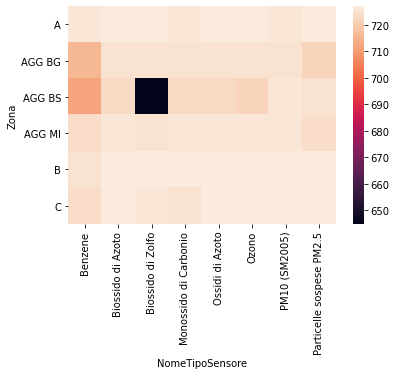

In [83]:
import seaborn
aa.reset_index(inplace = True)
aa = aa.pivot('Zona', 'NomeTipoSensore', 'Valore_MEAN_day_zona_tipo')
seaborn.heatmap(aa)

## Esporto il dataframe

In [49]:
#aria_sensori_zone__day_zona_tipo.to_csv('aria_sensori_zone__day_zona_tipo.csv')